In [19]:
%load_ext autoreload
%autoreload 2

import torch

from data.generation import SpiralRotation, Patches
from visualization_utils.spheres import visualize_spheres_side_by_side, scatter3d_sphere

from encoders import get_mlp

import matplotlib.pyplot as plt
from simclr.simclr import SimCLR
from spaces import NSphereSpace

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Using', device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using cuda


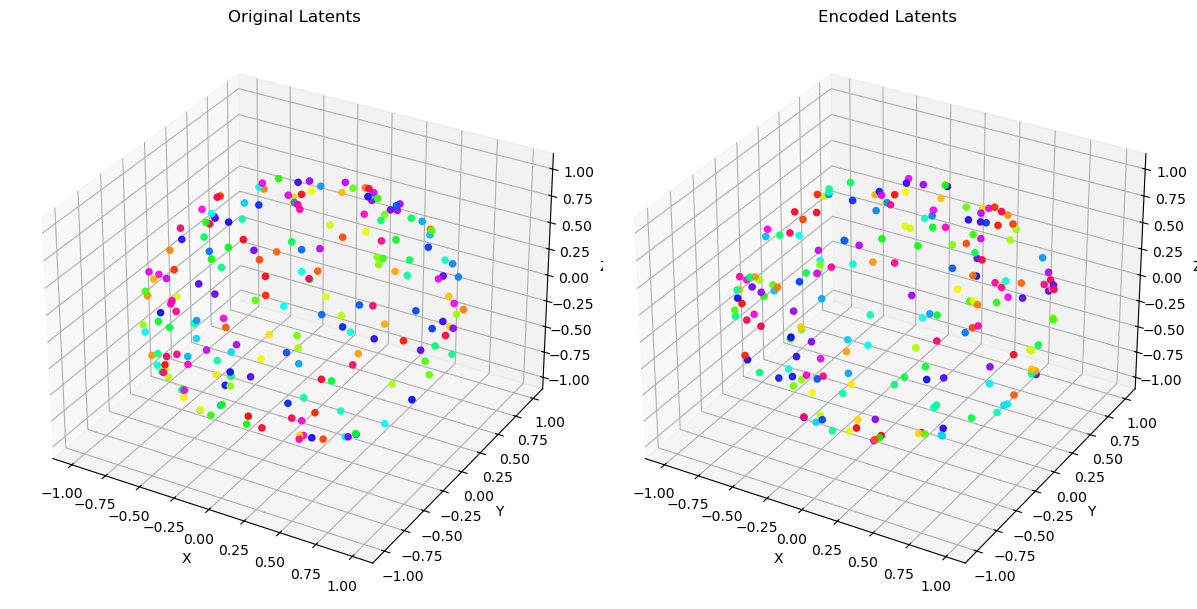

In [20]:
sphere = NSphereSpace(3)
g_spiral = SpiralRotation(2)

z = sphere.uniform(200)

visualize_spheres_side_by_side(plt, z, g_spiral(z))

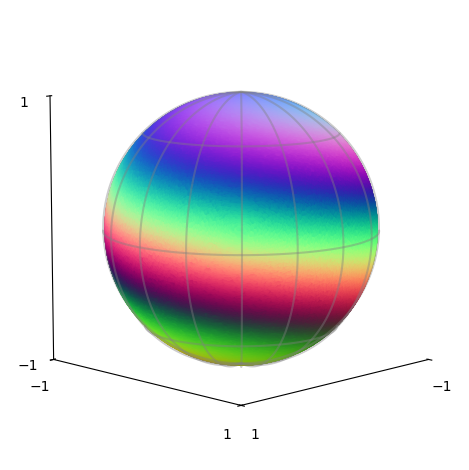

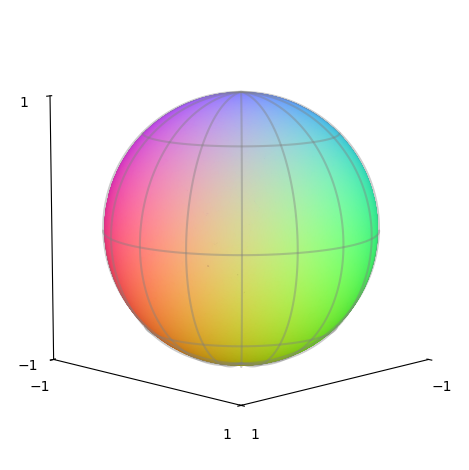

In [21]:
# Seeing the effect of 
z = sphere.uniform(100000)
fig = scatter3d_sphere(plt, z, g(z), s=10, a=.8)
fig = scatter3d_sphere(plt, z, z, s=10, a=.8)

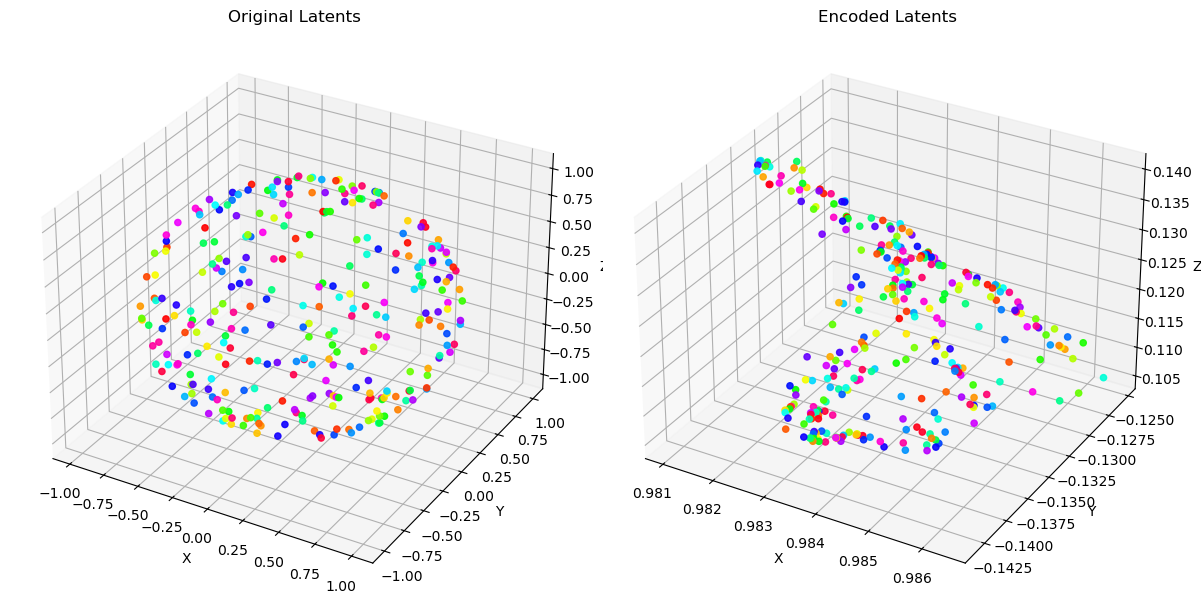

In [23]:
kappa = tau = 10
normal_concentration_param = 0.1 # Default in Zimmerman's code

iterations = 3000
batch = 6144

sample_pair_fixed = lambda batch: sphere.sample_pair_vmf(batch, kappa)
sample_uniform_fixed = lambda batch: sphere.uniform(batch)

# Initialize the multi-layer perceptron used for encoding
f = get_mlp(
    n_in=3,
    n_out=3,
    layers=[
        3 * 10,
        3 * 50,
        3 * 50,
        3 * 50,
        3 * 50,
        3 * 10,
    ],
    output_normalization="fixed_sphere",
).to("cpu")

h = lambda z: f(g_spiral(z))

z = sphere.uniform(300)
z_enc = h(z)

# Add coloring corresponding to initial points

visualize_spheres_side_by_side(plt, z, z_enc)

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.648681640625 Samples processed: 1 linear disentanglement: 0.4411899745464325 permutation disentanglement: 0.21220314502716064
Loss: 8.648137092590332 Samples processed: 251 linear disentanglement: 0.4472847878932953 permutation disentanglement: 0.20885448157787323
Loss: 8.64784049987793 Samples processed: 501 linear disentanglement: 0.44409385323524475 permutation disentanglement: 0.21041733026504517
Loss: 8.648548126220703 Samples processed: 751 linear disentanglement: 0.4675896465778351 permutation disentanglement: 0.20619897544384003
Loss: 8.648691177368164 Samples processed: 1001 linear disentanglement: 0.4608207643032074 permutation disentanglement: 0.2053559422492981
Loss: 8.649036407470703 Samples processed: 1251 linear disentanglement: 0.46796751022338867 permutation disentanglement: 0.2156067043542862
Loss: 8.648245811462402 Samples processed: 1501 linear disentanglement: 0.45983681082725525 permutation disentang

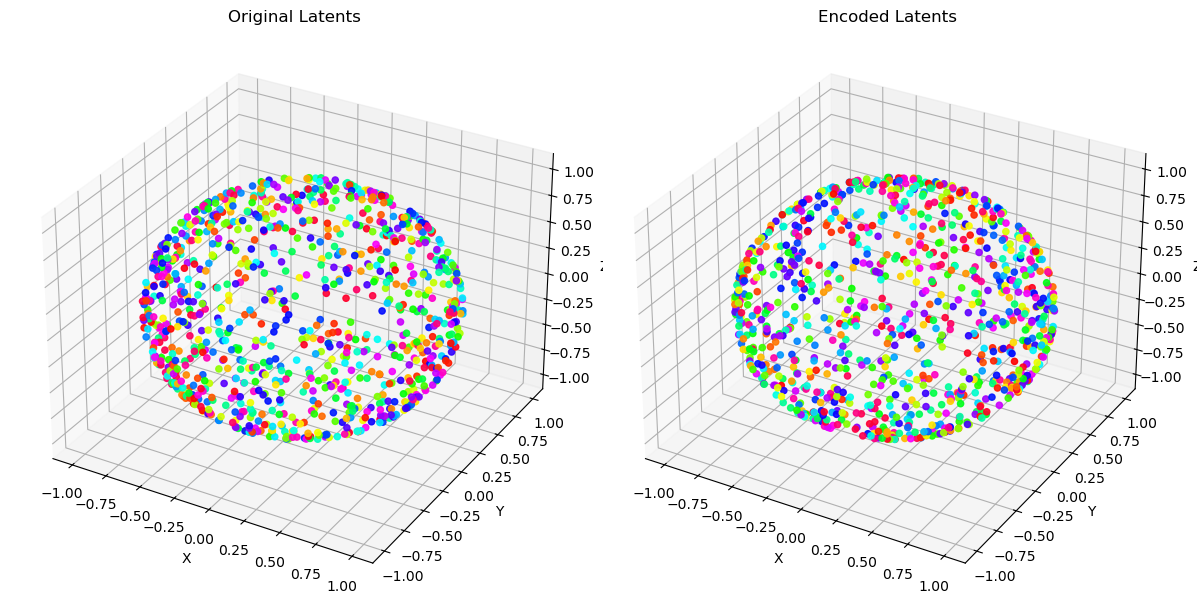

In [26]:
simclr_vmf = SimCLR(
    f, g_spiral, sample_pair_fixed, sample_uniform_fixed, tau, device
)

f = simclr_vmf.train(batch, iterations)

h = lambda latent: f(g_spiral(latent))

z = sphere.uniform(1000).to(device)
z_enc = h(z).to(device)

visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

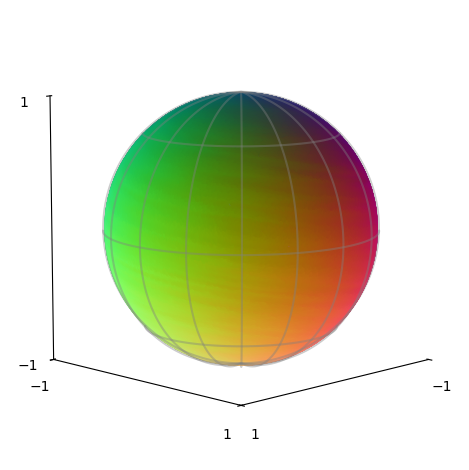

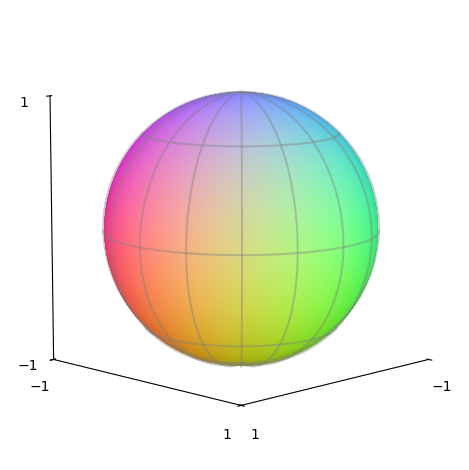

In [27]:
z = sphere.uniform(100000).to(device)
z_enc = h(z).to(device)

fig = scatter3d_sphere(plt, z.cpu(), z_enc.cpu(), s=10, a=.8)
fig = scatter3d_sphere(plt, z.cpu(), z.cpu(), s=10,a=0.8)

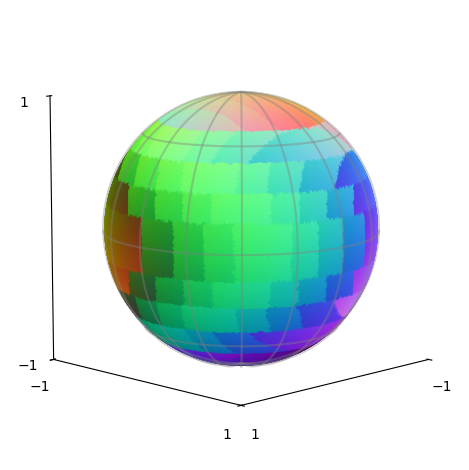

In [48]:
g_patches = Patches(5, device)

z = sphere.uniform(100000)
fig = scatter3d_sphere(plt, z.cpu(), g_patches(z.to(device)).cpu(), s=10, a=.8)

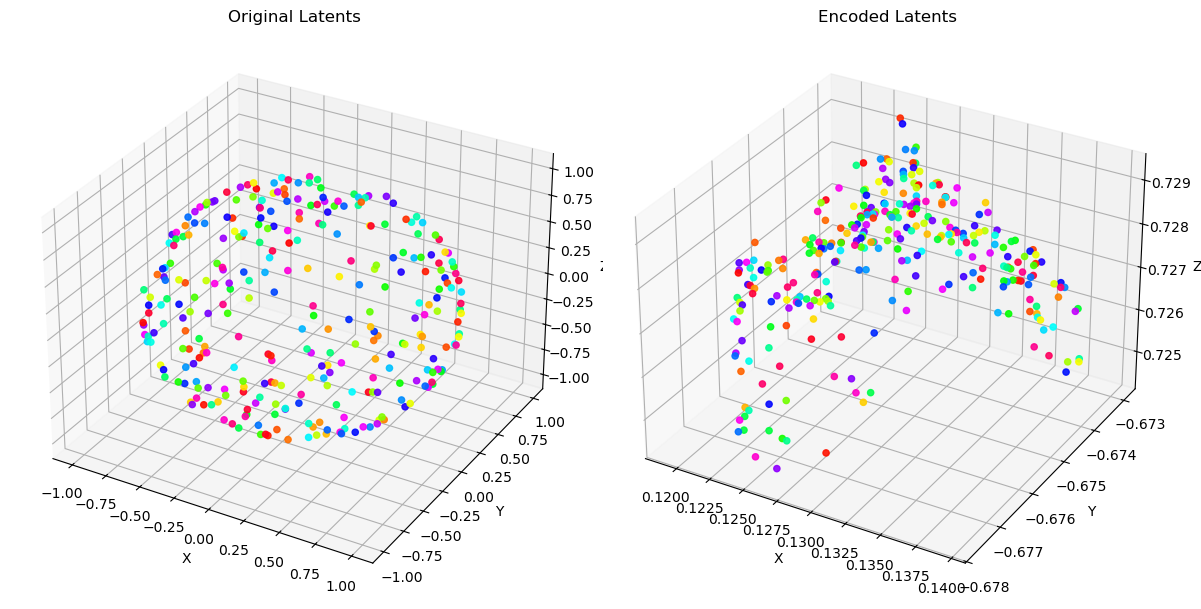

In [50]:
# Initialize the multi-layer perceptron used for encoding
f_patches = get_mlp(
    n_in=3,
    n_out=3,
    layers=[
        3 * 10,
        3 * 50,
        3 * 50,
        3 * 50,
        3 * 50,
        3 * 10,
    ],
    output_normalization="fixed_sphere",
).to(device)

h_patches = lambda z: f_patches(g_patches(z))

z = sphere.uniform(300)
z_enc = h_patches(z)

visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.723392486572266 Samples processed: 1 linear disentanglement: 0.2723971903324127 permutation disentanglement: 0.0002128879277734086
Loss: 8.646688461303711 Samples processed: 251 linear disentanglement: 0.7510477900505066 permutation disentanglement: 0.11319293826818466
Loss: 8.639914512634277 Samples processed: 501 linear disentanglement: 0.9092456698417664 permutation disentanglement: 0.07762300968170166
Loss: 8.638754844665527 Samples processed: 751 linear disentanglement: 0.9399085640907288 permutation disentanglement: 0.10303554683923721
Loss: 8.638481140136719 Samples processed: 1001 linear disentanglement: 0.9527025818824768 permutation disentanglement: 0.09709298610687256
Loss: 8.637930870056152 Samples processed: 1251 linear disentanglement: 0.9598379731178284 permutation disentanglement: 0.10986445099115372
Loss: 8.63837718963623 Samples processed: 1501 linear disentanglement: 0.9601054191589355 permutation disen

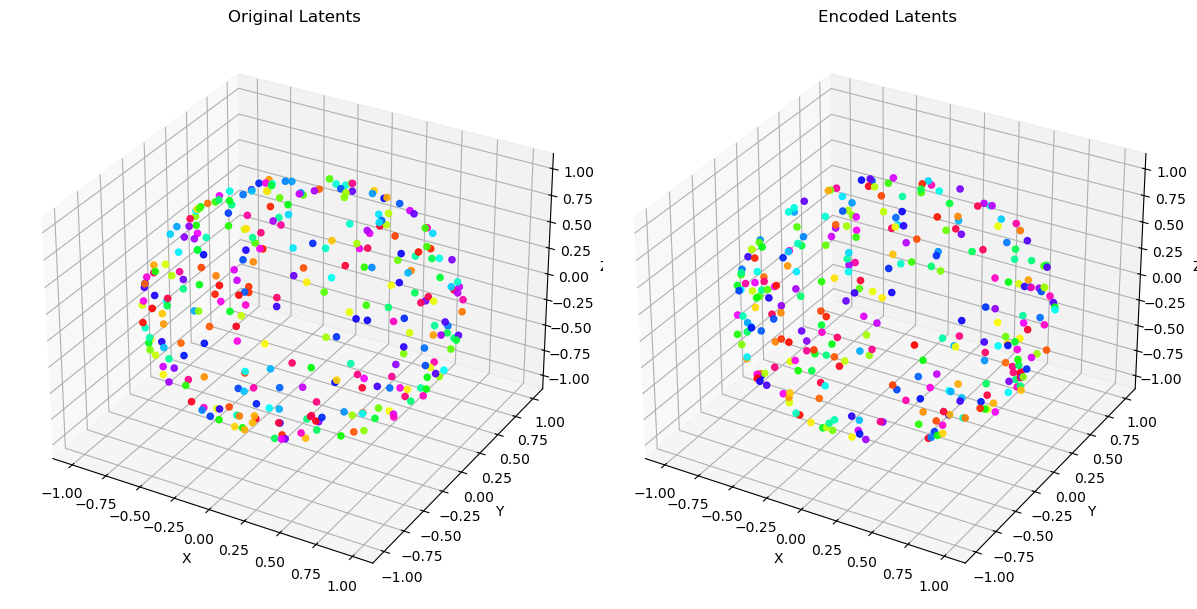

In [51]:
simclr_patches_vmf = SimCLR(
    f_patches, g_patches, sample_pair_fixed, sample_uniform_fixed, tau, device
)

f_patches = simclr_patches_vmf.train(batch, iterations)

z = sphere.uniform(300)
z_enc = h_patches(z)

visualize_spheres_side_by_side(plt, z, z_enc)

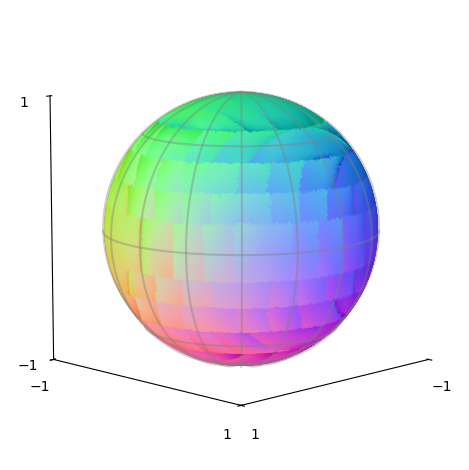

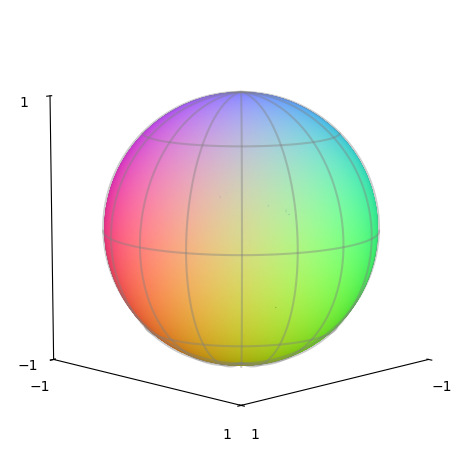

In [53]:
z = sphere.uniform(100000)
z_enc = h_patches(z)

fig = scatter3d_sphere(plt, z.cpu(), z_enc.cpu(), s=10, a=.8)
fig = scatter3d_sphere(plt, z.cpu(), z.cpu(), s=10,a=0.8)